## Download and install Python packages

In [1]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('Scipy: {}'.format(scipy.__version__))
import numpy
print('Numpy: {}'.format(numpy.__version__))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Scipy: 1.5.2
Numpy: 1.18.5
Matplotlib: 3.3.2
Pandas: 1.1.3
Sklearn: 0.23.2


In [2]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

## Load the dataset and understand it's statistical summaries and data visualization

In [3]:
# loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-lenght', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names = names)

In [4]:
# dimension of the dataset
print(dataset.shape)

(150, 5)


In [5]:
# take a peek at the data
print(dataset.head(20))

    sepal-lenght  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [6]:
# statiscal summary
print(dataset.describe())

       sepal-lenght  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


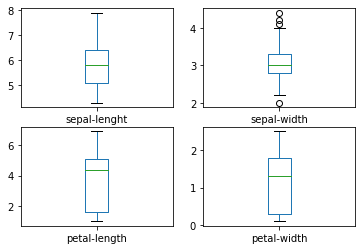

In [8]:
# univariate plots - box and whisker plots
dataset.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
pyplot.show()

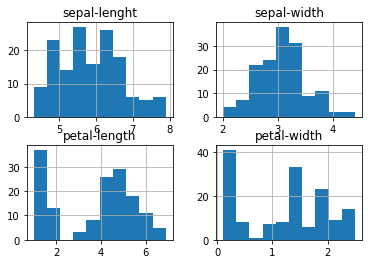

In [9]:
# histogram of the variable
dataset.hist()
pyplot.show()

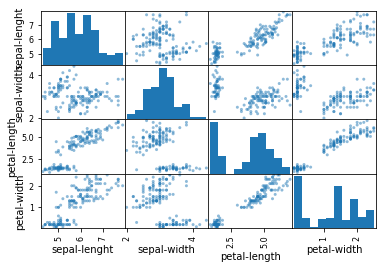

In [10]:
# multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [11]:
# creating a validation dataset
# splitting dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, train_size = 0.2, random_state = 1)

## Create 6 ML models  

In [12]:
# Logistic Regression
# Linear Discriminant Analysis
# K-Nearest Neighbors
# Classification and Regression Trees
# Gausian Naive Bayes
# Support vector Machines

# Bulding models
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [14]:
# evaluate the created models
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 7, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.907143 (0.108327)
LDA: 0.964286 (0.087482)
KNN: 0.935714 (0.102519)
NB: 1.000000 (0.000000)
SVM: 0.971429 (0.069985)


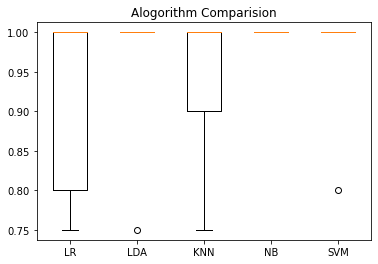

In [15]:
# compare our model
pyplot.boxplot(results, labels=names)
pyplot.title('Alogorithm Comparision')
pyplot.show()

In [16]:
# make predictions on svm
model = SVC(gamma = 'auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation) 

In [17]:
# evaluate our predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9416666666666667
[[40  0  0]
 [ 0 34  3]
 [ 0  4 39]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.89      0.92      0.91        37
 Iris-virginica       0.93      0.91      0.92        43

       accuracy                           0.94       120
      macro avg       0.94      0.94      0.94       120
   weighted avg       0.94      0.94      0.94       120

